In [0]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls
%cd '/content/drive/My Drive/Amazon Review System'

drive  sample_data
/content/drive/My Drive/Amazon Review System


In [0]:
#Import pandas library and read the csv file
import numpy as np
import pandas as pd
df = pd.read_json("Musical_Instruments_data.json", lines=True)

In [5]:
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cd2bf6320>]],
      dtype=object)

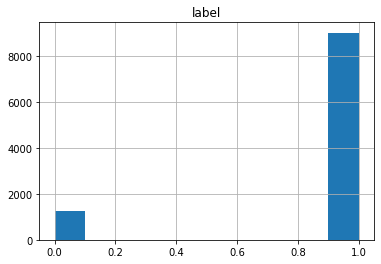

In [6]:
df = df[df["overall"] != '3'] # need datatype=object
df["label"] = df["overall"].apply(lambda rating : +1 if rating > 3.0 else 0)

df.shape

df.hist(column='label')

In [7]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
label              0
dtype: int64

In [0]:
#Feature text is stored in X and response/class in y
X = df.reviewText
Y = df.label

In [0]:
#Import train_test and split X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.3)

In [14]:
#Import CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [15]:
#Define document term matrix using CountVectorizer
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print(X_train_vect[0])

  (0, 7832)	2
  (0, 17332)	5
  (0, 7381)	1
  (0, 16397)	1
  (0, 15416)	1
  (0, 14730)	1
  (0, 1332)	1
  (0, 11390)	1
  (0, 15590)	1
  (0, 11414)	1
  (0, 14335)	1
  (0, 8913)	1
  (0, 7181)	1
  (0, 15073)	1
  (0, 15276)	2
  (0, 12885)	1
  (0, 2717)	1
  (0, 14079)	1
  (0, 9077)	1
  (0, 17126)	1
  (0, 7708)	1
  (0, 5717)	1
  (0, 11420)	1
  (0, 17099)	1
  (0, 8354)	1
  (0, 9712)	1
  (0, 5708)	1
  (0, 2040)	1
  (0, 10297)	1
  (0, 8492)	1
  (0, 13171)	1


In [0]:
#Import MultinomialNB as a classification model to predict good or bad reivew
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [17]:
#Train model
model.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#Predict for document term matrix of test samples
y_pred = model.predict(X_test_vect)

In [19]:
#Calculate accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8928223449171809

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2715   16]
 [ 314   34]]


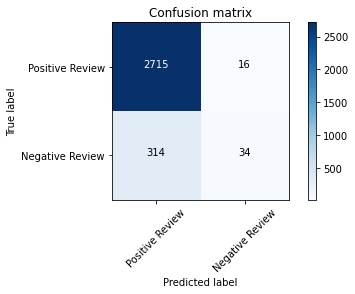

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive Review','Negative Review'], normalize= False,  title='Confusion matrix')